In [1]:
import pandas
import numpy
import os
import pybedtools
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/arushiv/toolScripts')
from esiScoreAfterMean import calculate_ESI

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])
                
    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())


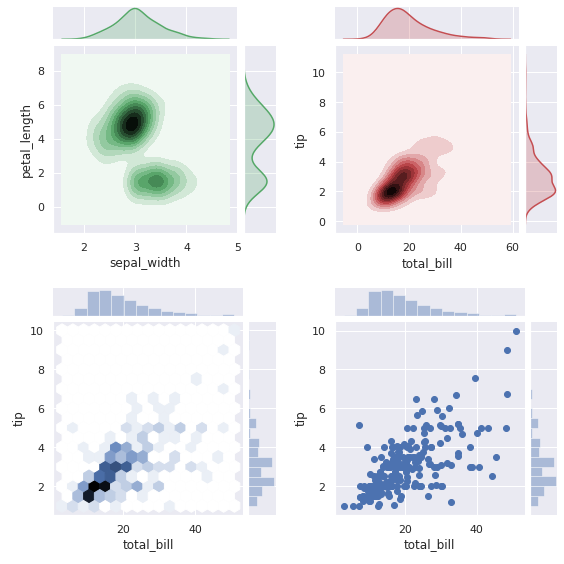

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
#import SeabornFig2Grid as sfg
sfg = SeabornFig2Grid

g3 = sns.jointplot("sepal_width", "petal_length", data=iris,
                   kind="kde", space=0, color="g")

g4 = sns.jointplot("total_bill", "tip", data=tips, kind="kde", space=0, color="r")
g5 = sns.jointplot("total_bill", "tip", data=tips, kind="hex")
g6 = sns.jointplot("total_bill", "tip", data=tips)
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 2)


# sfg(g4, fig, gs[2])
mg0 = sfg(g3, fig, gs[0])
mg1 = sfg(g4, fig, gs[1])
mg2 = sfg(g5, fig, gs[2])
mg3 = sfg(g6, fig, gs[3])
gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()


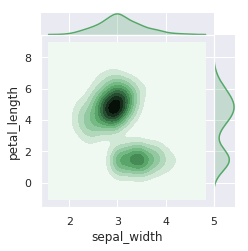

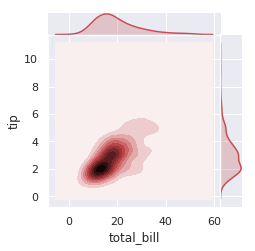

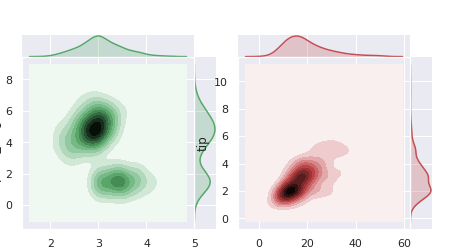

In [3]:
JG1 = sns.jointplot("sepal_width", "petal_length", data=iris,
                   kind="kde", space=0, color="g")

JG2 = sns.jointplot("total_bill", "tip", data=tips, kind="kde", space=0, color="r")

#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

#subplots size adjustment
f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])
plt.show()

/home/arushiv/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


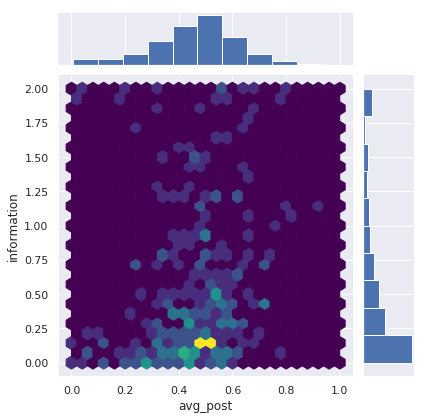

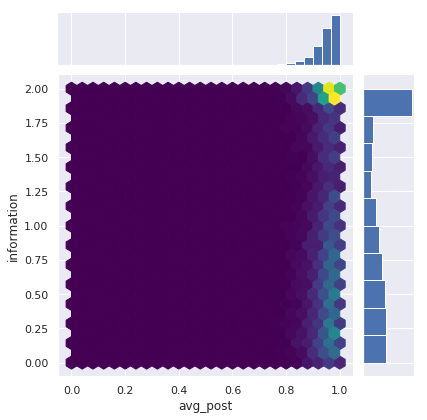

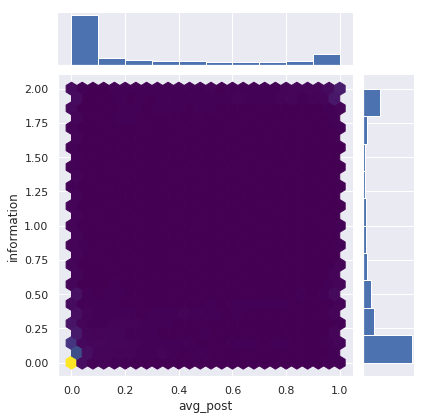

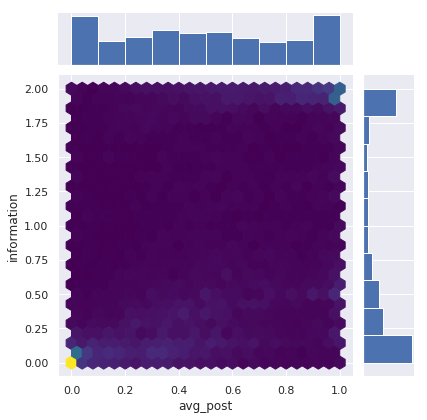

In [23]:
p1 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")])
p2 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="stretchEnhancer")])
p3 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="hotRegions")])
p4 = makeHexBin(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="typicalEnhancers")])

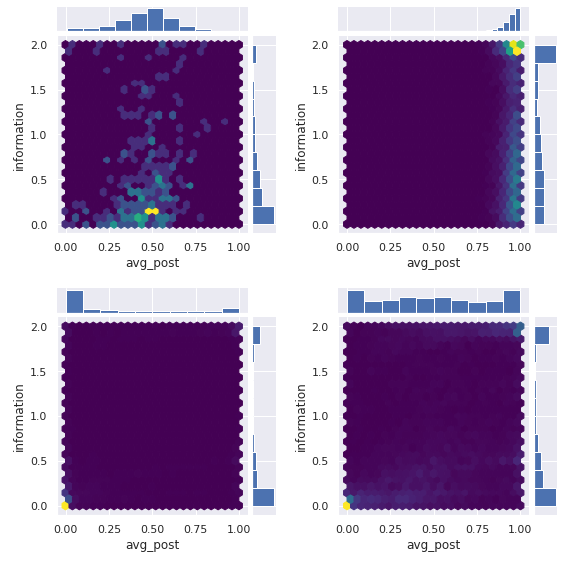

In [25]:
sfg = SeabornFig2Grid

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 2)


# sfg(g4, fig, gs[2])
mg0 = sfg(p1, fig, gs[0])
mg1 = sfg(p2, fig, gs[1])
mg2 = sfg(p3, fig, gs[2])
mg3 = sfg(p4, fig, gs[3])
gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()


In [59]:
d_information = pandas.read_csv("intermediateFiles/calculate_avg_posterior/information.fourcells_enhancer.dat", sep='\t')
def makeHexBin(group):
   # print(group.head())
    group = group.dropna(axis=0, subset=['avg_post','information'])
    x = group['avg_post']
    y = group['information']
    g = sns.JointGrid(x, y)
    g.ax_marg_x.hist(x)
    g.ax_marg_y.hist(y, orientation="horizontal")
    g.plot_joint(plt.hexbin, gridsize=25, extent=[0, 1, 0, 2], cmap="viridis")
    
    return g

In [181]:
def myjoint(group, x, y):
    #print(group.name)
    g = sns.jointplot(data=group, x=x, y=y, kind="kde")
#     g = sns.jointplot(data=group, x=x, y=y, kind="hex", joint_kws={'gridsize':25})
    g.ax_joint.set_xlabel("")
    g.ax_joint.set_ylabel("")
    if group.name[0] == "GM12878":
        g.ax_marg_x.set_title(group.name[1])
    if group.name[1] == "broadDomains":
        g.ax_joint.set_ylabel(f"{group.name[0]}\n\nInformation")
    if group.name[0] == "K562":
        g.ax_joint.set_xlabel("Average Posterior")
#     if group.name[1] == "typicalEnhancers":
#         g.ax_marg_y.set_ylabel(group.name[0])
    return g
    

In [182]:
def makeIndividualPlots(d, row, col,  x, y, plotfunc=myjoint , figsize=(6,6), figname=None, kind="hex"):
    nrow = len(d[row].drop_duplicates())
    ncol = len(d[col].drop_duplicates())
       
    print(d[row].drop_duplicates().sort_values().iloc[0])                                                                                                                                                                                                                                                                         
    print(d[col].drop_duplicates().sort_values().iloc[0])                                                                                                                                                                                                                                                                          
    print(d[row].drop_duplicates().sort_values(ascending=False).iloc[0])                                                                                                                                                                                                                                                           
    print(d[col].drop_duplicates().sort_values(ascending=False).iloc[0])  
    
    list_of_plots = d.groupby([row, col]).apply(lambda group: plotfunc(group, x, y))
    plotdf = list_of_plots.reset_index().reset_index()
    
    sfg = SeabornFig2Grid
    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrow, ncol)
    gs.update(wspace=0.00, hspace=0.00)
    
    def newplot(x):
        sfg(x[0], fig, gs[x['index']])
#         if x['index'] == 17:
#             plt.xlabel("Avg Post")
        
            
    plotdf.apply(lambda x: newplot(x), axis=1)
    
    #fig.suptitle('An overall title', size=20)
    
    gs.tight_layout(fig)
    
#gs.update(top=0.7)
    plt.show()
    
        

GM12878
broadDomains
K562
typicalEnhancers


/home/arushiv/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


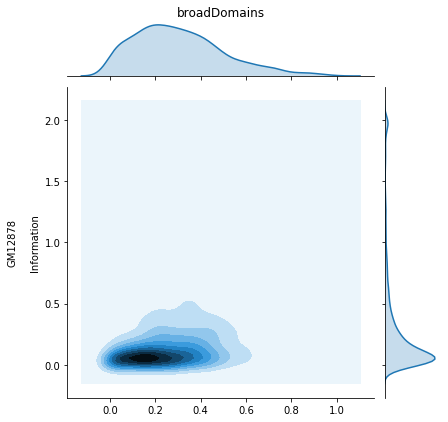

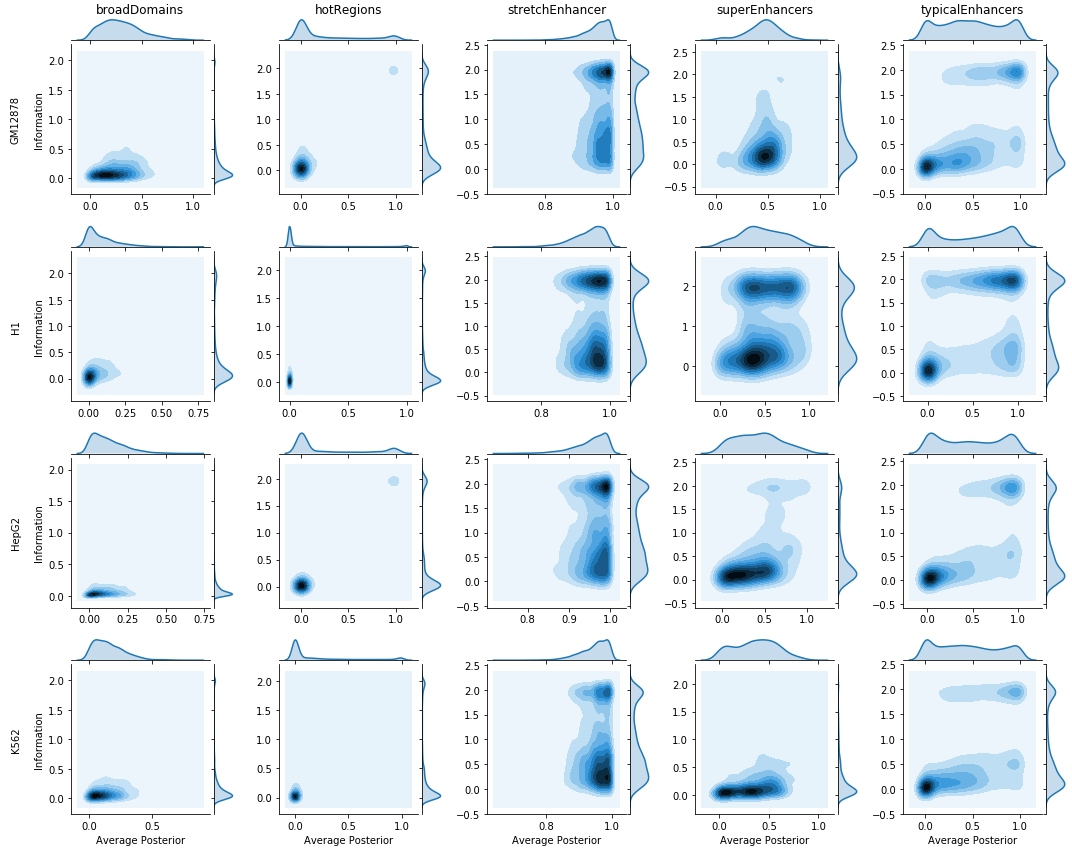

In [183]:
t=makeIndividualPlots(d_information, 'cell', 'annotation', 'avg_post', 'information', figsize=(15, 12))
 #.fig.subplots_adjust(wspace=.05, hspace=.05)

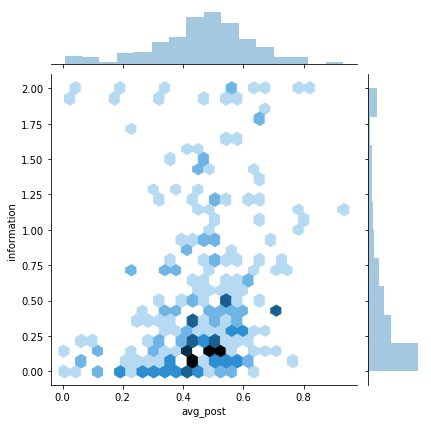

In [166]:
sns.jointplot(data=d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")], 
              x="avg_post", y="information", kind="hex", joint_kws={'gridsize':25})

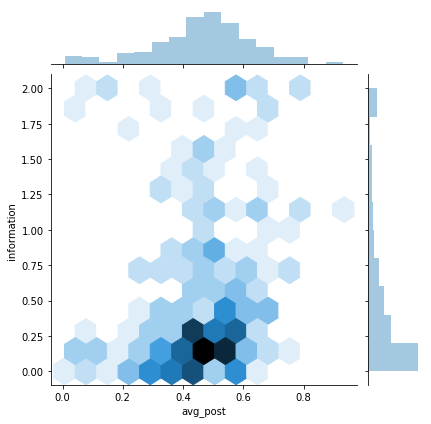

In [169]:
sns.jointplot(data=d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")], 
              x="avg_post", y="information", kind="hex", joint_kws={'bins':257})

In [167]:
len(d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")].index)

257

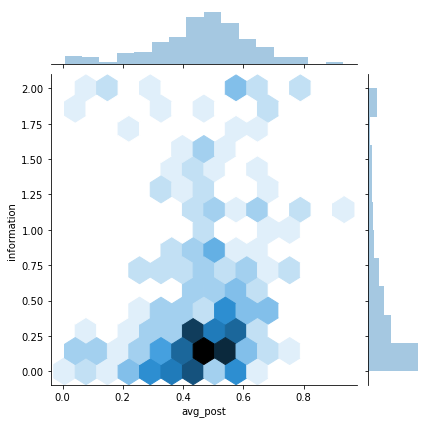

In [170]:
sns.jointplot(data=d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")], 
              x="avg_post", y="information", kind="hex")

In [ ]:
sup = d_information[(d_information['cell']=="GM12878") & (d_information['annotation']=="superEnhancers")]


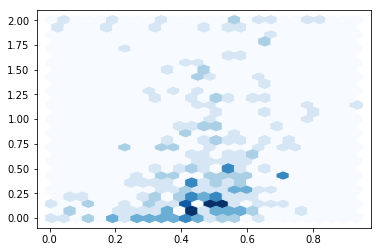

In [173]:
plt.hexbin(sup['avg_post'], sup['information'], cmap="Blues", gridsize=25)

TypeError: 'PolyCollection' object is not iterable

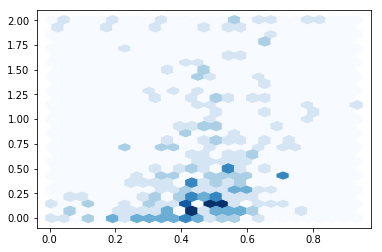

In [178]:
fig, axes = plt.hexbin(sup['avg_post'], sup['information'], cmap="Blues", gridsize=25, bins=237)
fig.colorbar

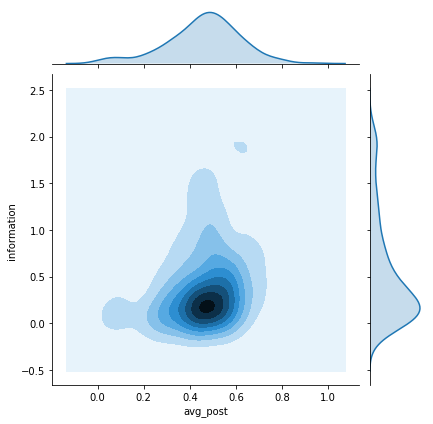

In [180]:
sns.jointplot(data=sup, 
              x="avg_post", y="information", kind="kde")